In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt 
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

Load Dataset


In [9]:
paths = []
labels = []
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        # print(filename)
        label = filename.split('_')[-1]
        # print(label)
        label = label.split('.')[0]
        labels.append(label.lower())

print("Dataset is loaded successfully")

Dataset is loaded successfully


In [10]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [12]:
labels[:-5]

['fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 

In [13]:
df  = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [14]:
df.label.value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

**Exploratory Data Analysis**

In [16]:
df.dtypes

speech    object
label     object
dtype: object

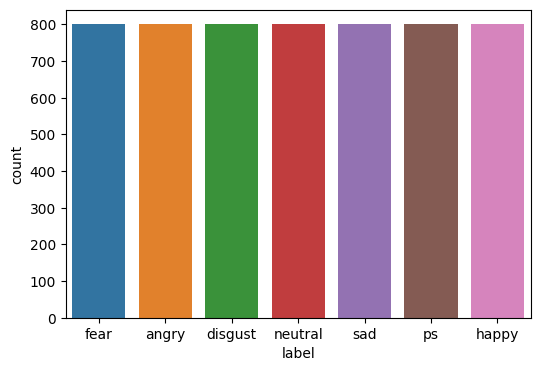

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)

plt.show()

Display the waveform of the AudioFile

In [30]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,6))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,6))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis = 'time',y_axis='hz')
    plt.colorbar()


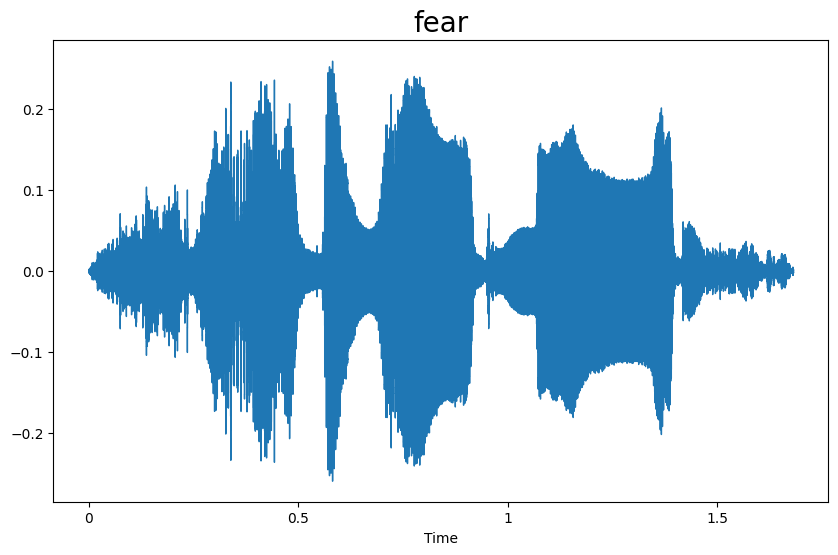

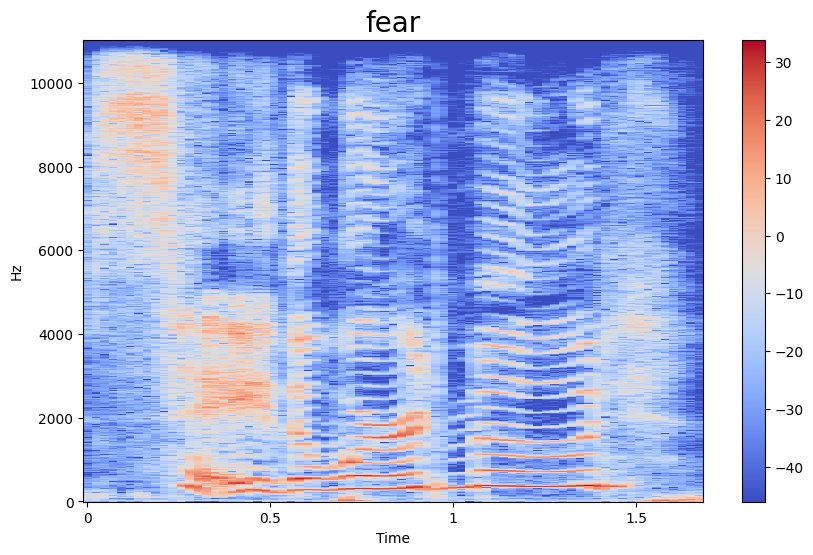

In [33]:
emotion = 'fear'
path = df['speech'][df['label']==emotion][109]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)

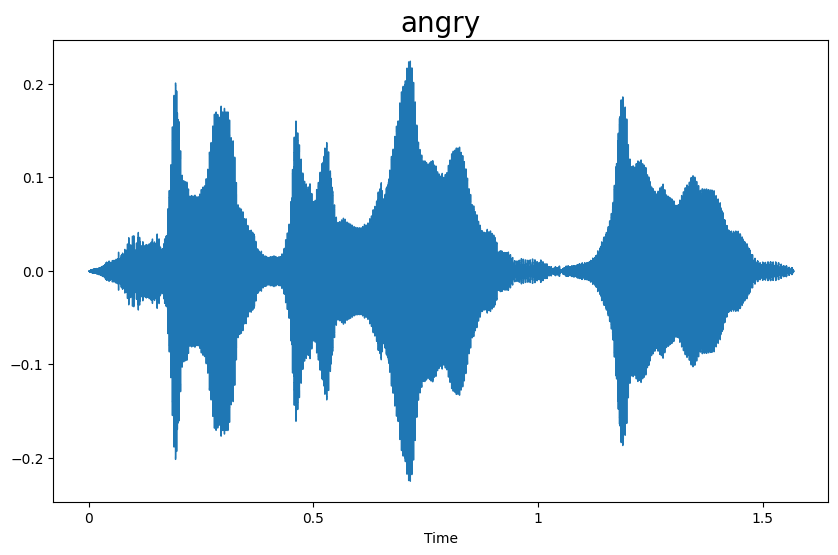

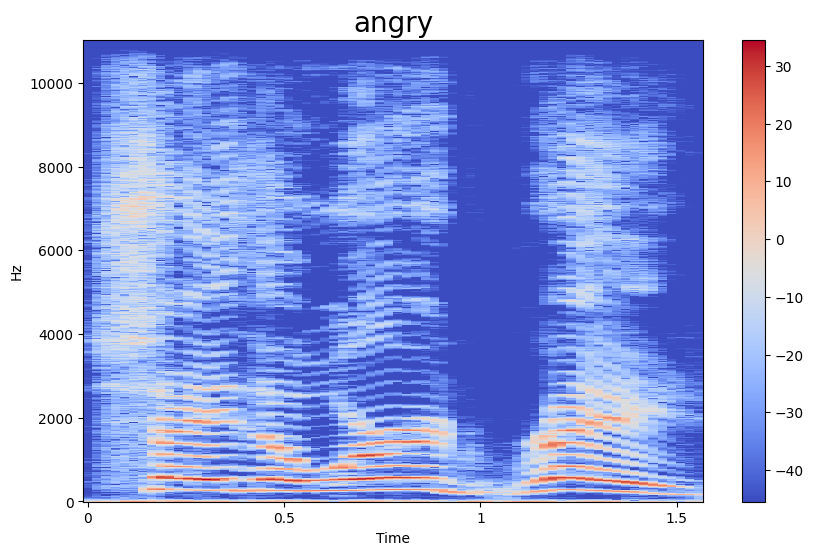

In [35]:
emotion = 'angry'
path =np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

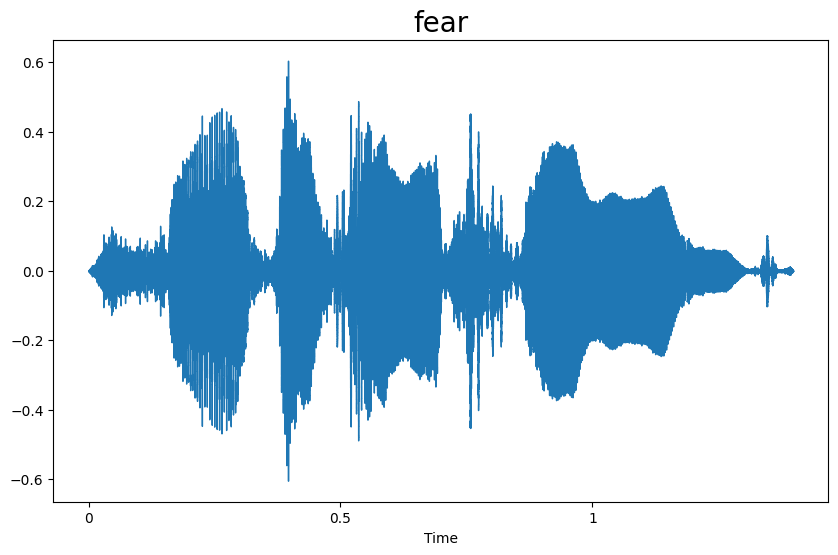

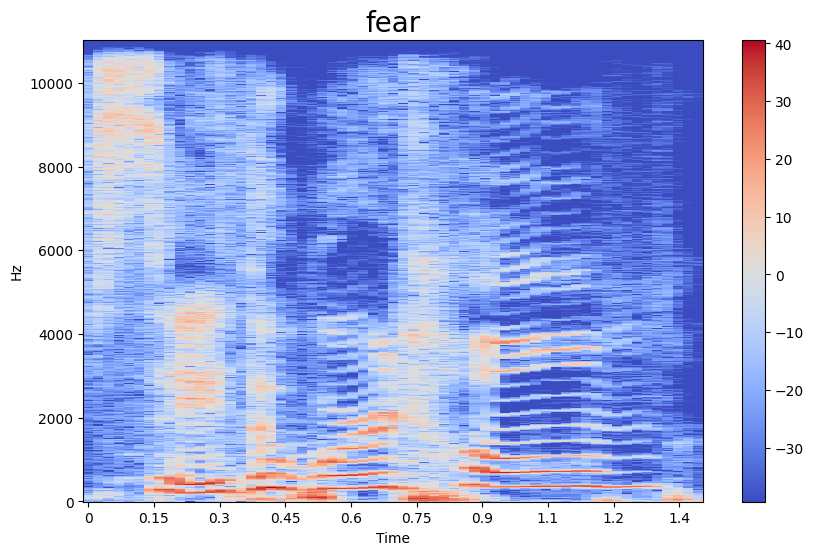

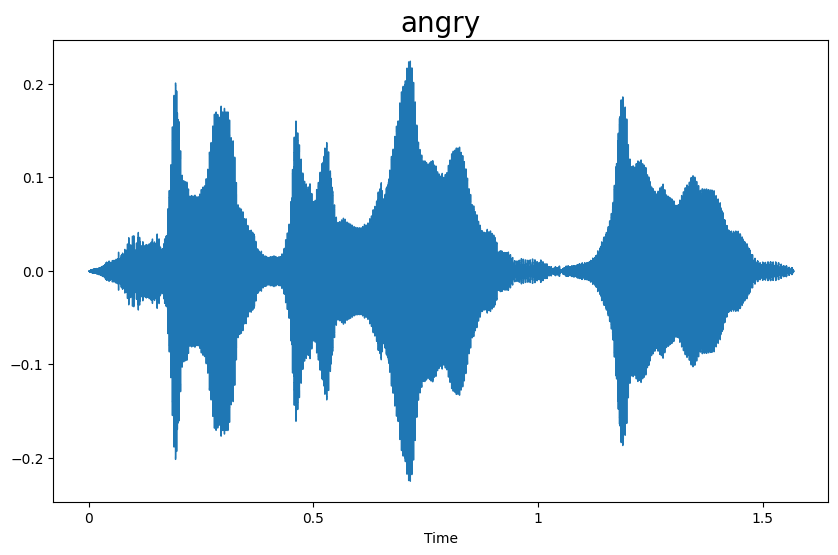

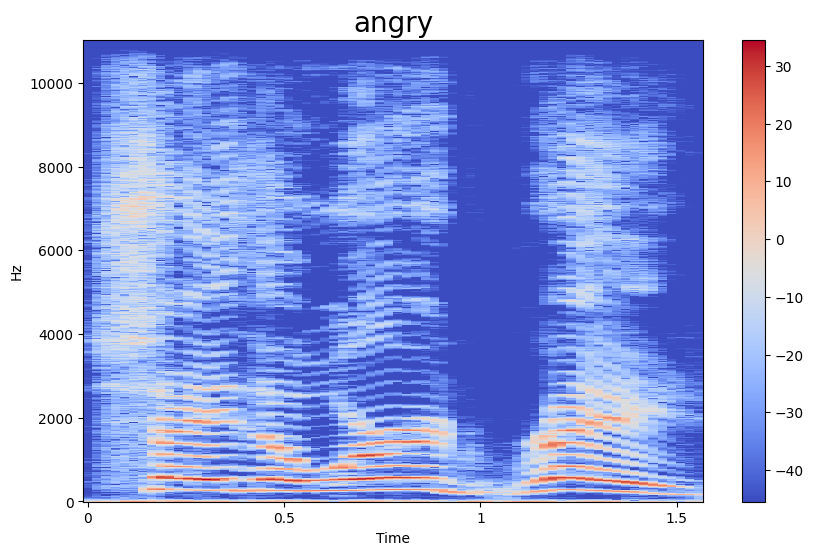

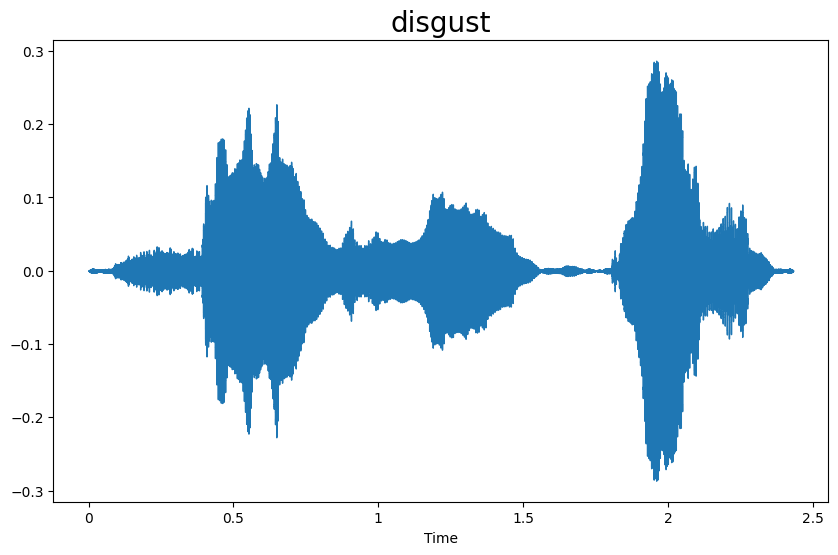

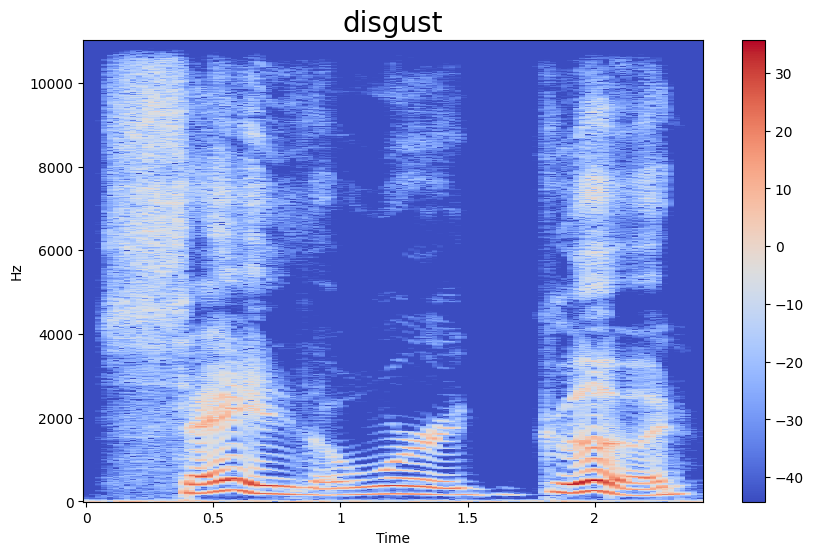

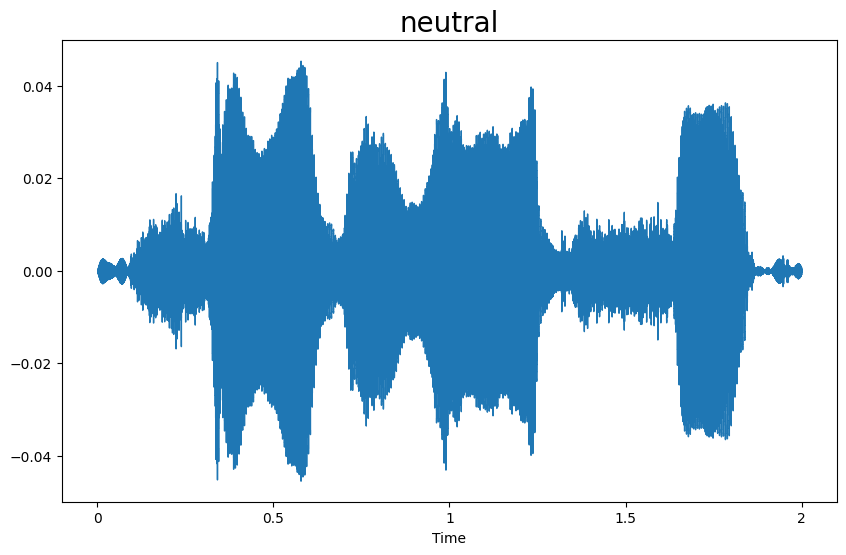

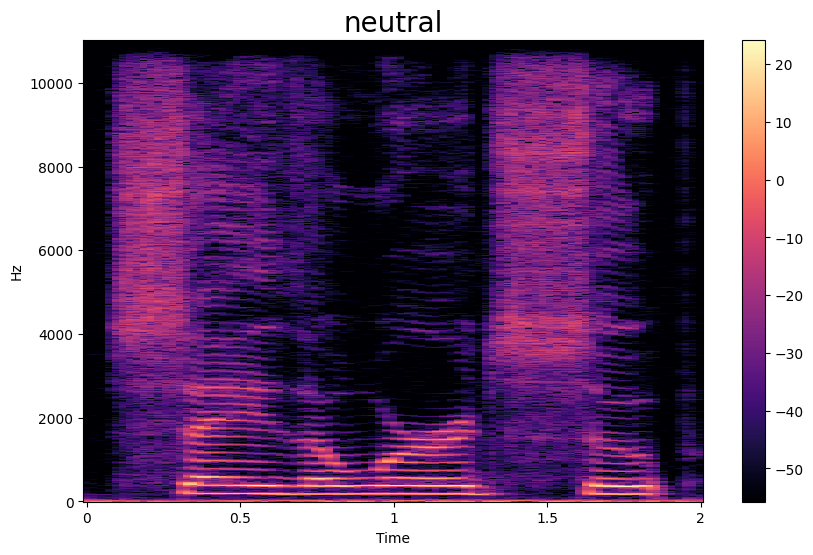

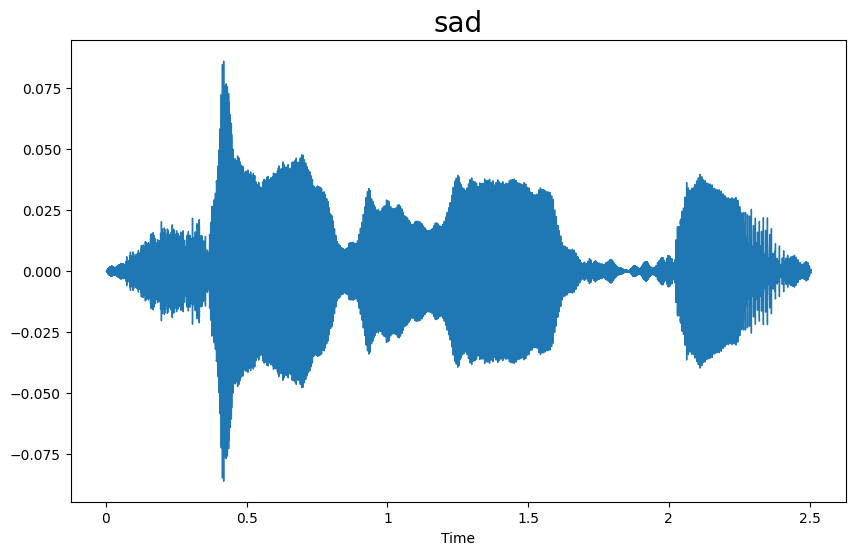

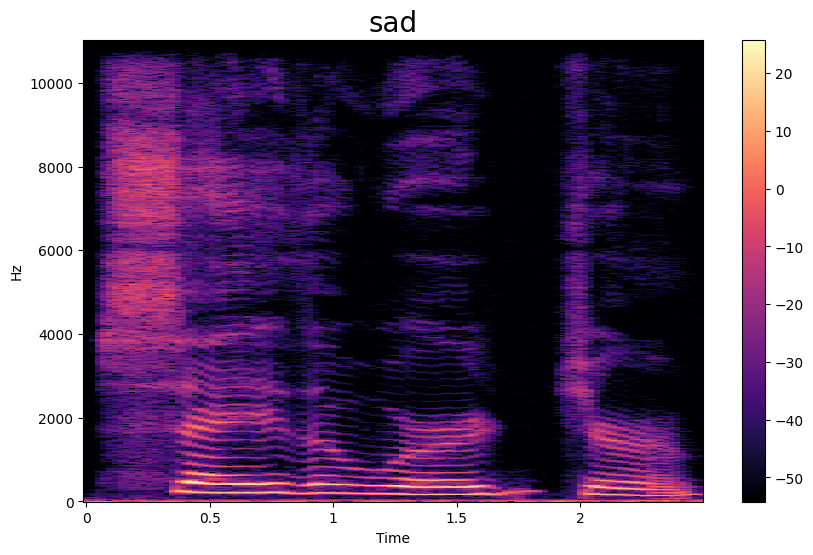

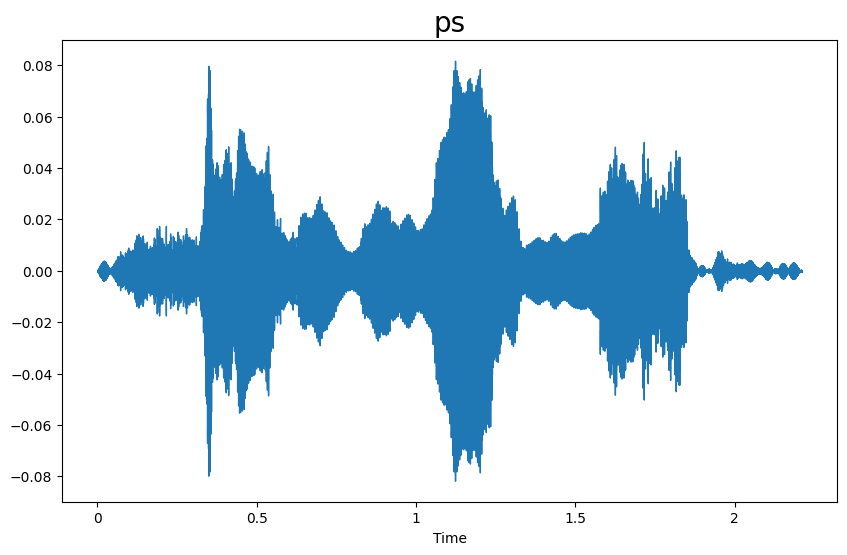

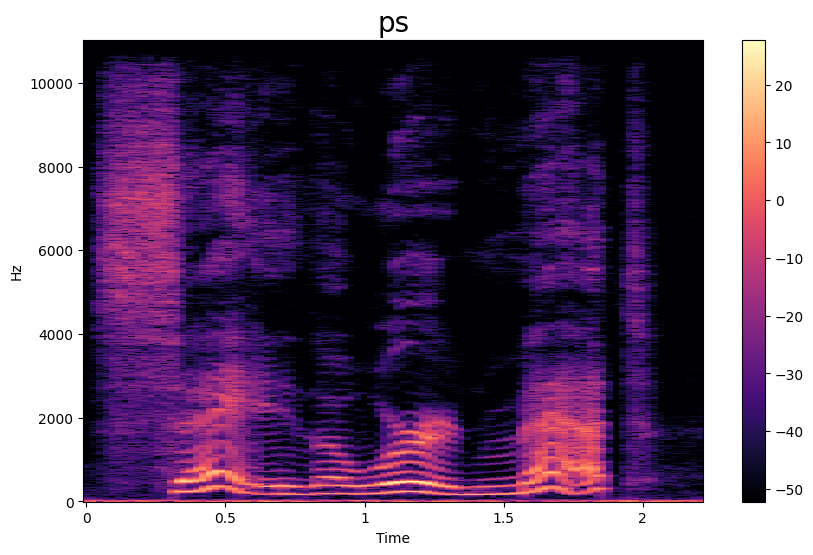

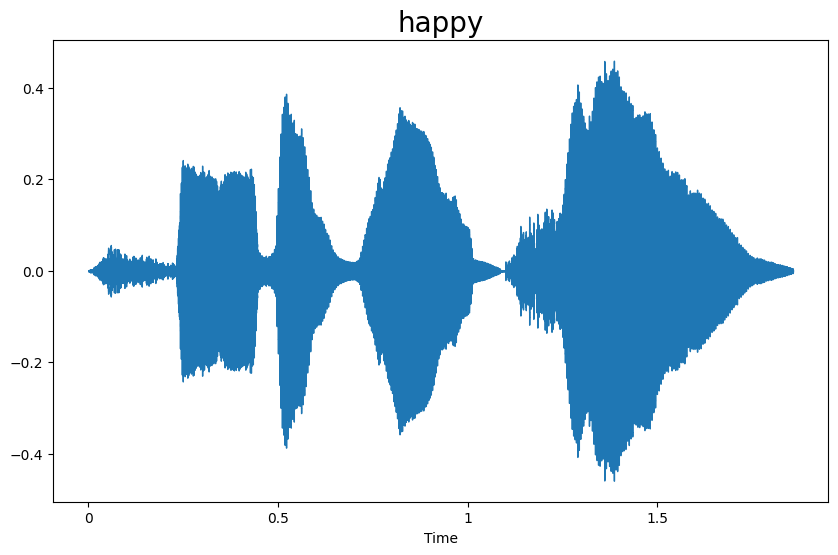

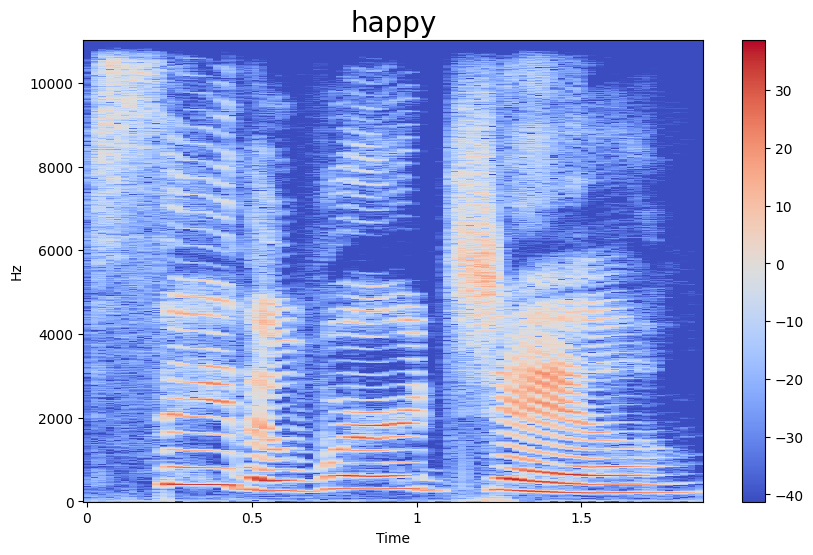

In [37]:
for emotion in df['label'].unique():
    path = np.array(df['speech'][df['label'] == emotion])[0]  # Get first file path for the emotion
    data, sampling_rate = librosa.load(path)  # Load audio
    
    waveplot(data, sampling_rate, emotion)  # Plot waveform
    spectogram(data, sampling_rate, emotion)  # Plot spectrogram
    display(Audio(path))

"Feature Extraction from Audio Files"

In [38]:
def extract_mfcc(filename):
    y,sr = librosa.load(filename,duration=3,offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [39]:
extract_mfcc(df['speech'][0])

array([-285.73727  ,   85.78295  ,   -2.1689112,   22.125532 ,
        -14.757396 ,   11.051346 ,   12.41245  ,   -3.000262 ,
          1.0844992,   11.078272 ,  -17.419659 ,   -8.093213 ,
          6.5879726,   -4.2209525,   -9.15508  ,    3.5214796,
        -13.186381 ,   14.078853 ,   19.66973  ,   22.725618 ,
         32.574635 ,   16.325033 ,   -3.8427296,    0.8962965,
        -11.239263 ,    6.653462 ,   -2.5883694,   -7.714016 ,
        -10.941657 ,   -2.4007545,   -5.2812867,    4.2711573,
        -11.202217 ,   -9.024621 ,   -3.6669843,    4.869744 ,
         -1.6027982,    2.5600514,   11.454374 ,   11.233449 ],
      dtype=float32)

In [40]:
x_mfcc = df.speech.apply(lambda x:extract_mfcc(x))

In [41]:
x_mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.8413274, 14.658876,...
2       [-340.11435, 53.79644, -14.267782, 20.884027, ...
3       [-306.63422, 21.259705, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.025058484, 8.431059, ...
5596    [-313.96478, 39.847843, -5.6493053, -3.8675754...
5597    [-357.54883, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.1474, 101.6839, -14.175897, -12.037376, ...
5599    [-389.4595, 54.042767, 1.3469975, -1.4258981, ...
Name: speech, Length: 5600, dtype: object

In [48]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [49]:
X = np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [47]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])


y = to_categorical(df['label_encoded'])

print(y.shape)  

(5600, 7)


Create LSTM Model

In [52]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model = Sequential (
    [
        LSTM(123,return_sequences = False,input_shape=(40,1)),
        Dense(64,activation = 'relu'),
        Dropout(0.2),
        Dense(32,activation='relu'),
        Dropout(0.2),
        Dense(7,activation='softmax')
    ]
)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

Train the model

In [58]:
history = model.fit(X,y,validation_split=0.3,epochs=100,batch_size=512,shuffle=True,verbose=True)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - accuracy: 0.2621 - loss: 1.8744 - val_accuracy: 0.1410 - val_loss: 1.9259
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.4751 - loss: 1.6284 - val_accuracy: 0.2493 - val_loss: 1.8395
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.6222 - loss: 1.2868 - val_accuracy: 0.3575 - val_loss: 1.6360
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.6644 - loss: 1.0132 - val_accuracy: 0.5306 - val_loss: 1.3051
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.7273 - loss: 0.7707 - val_accuracy: 0.7174 - val_loss: 0.9032
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.7849 - loss: 0.6373 - val_accuracy: 0.7930 - val_loss: 0.6853
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.8452 - loss: 0.4713 - val_accuracy: 0.8888 - val_loss: 0.4607
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.8688 - loss: 0.3947 - val_accuracy: 0.9197 - v

Plot the Results

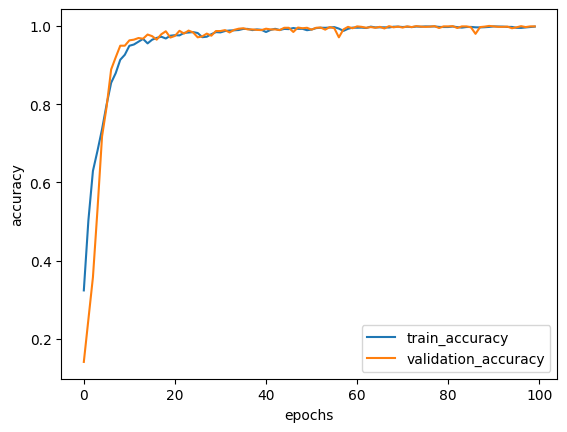

In [62]:
epochs=list(range(100))
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,accuracy,label='train_accuracy')
plt.plot(epochs,val_acc,label='validation_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


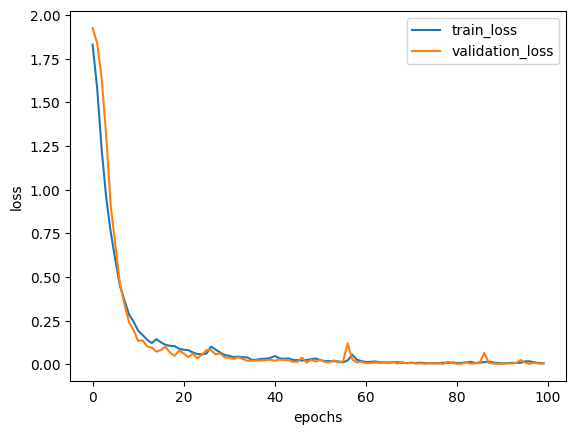

In [64]:
epochs=list(range(100))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,label='train_loss')
plt.plot(epochs,val_loss,label='validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [67]:
# Save the model
model.save("lstm_emotion_model.h5")
